In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.integrate

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FFMpegWriter

%config InlineBackend.figure_format='retina' # makes animation display better

%matplotlib osx 

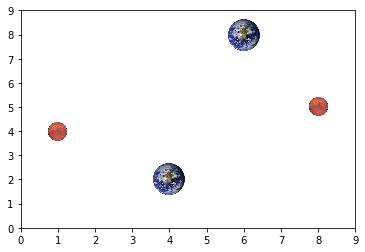

In [11]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def getImage(path):
    return OffsetImage(plt.imread(path, format="jpg"), zoom=.03)

paths = ['mars.png', 'earth.png', 'mars.png', 'earth.png']
x = [8, 4, 1, 6]
y = [5, 2, 4, 8]
fig, ax = plt.subplots()
for x0, y0, path in zip(x, y, paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)
plt.xticks(range(10))
plt.yticks(range(10))
plt.show()


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

fig, ax = plt.subplots()

ax.set_xlim([-1,1])
ax.set_ylim([-1,1])

L = 50
theta = np.linspace(0,2*np.pi,L)
r = np.ones_like(theta)

x = r*np.cos(theta)
y = r*np.sin(theta)

line, = ax.plot(1,0, 'ro')

annotation = ax.annotate(
    'annotation', xy=(1,0), xytext=(-1,0),
    arrowprops = {'arrowstyle': "->"}
)

def update(i):

    new_x = x[i%L]
    new_y = y[i%L]
    line.set_data(new_x,new_y)

    ##annotation.xytext = (-new_x,-new_y) <-- does not work
    annotation.set_position((-new_x,-new_y))
    annotation.xy = (new_x,new_y)

    return line, annotation

ani = animation.FuncAnimation(
    fig, update, interval = 500, blit = False
)

plt.show()